In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset, Dataset

In [2]:
DATASET_ID = "GustavoHCruz/DNA_Coding_Regions"

In [3]:
dataset = load_dataset(DATASET_ID, split="train")

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/21 [00:00<?, ?it/s]

In [4]:
def cientific_name(
	name: str
) -> str:
	parts = name.split()
	if len(parts) >= 2:
		genus_abrev = parts[0][0] + "."
		rest = " ".join(parts[1:])
		return f"$\\it{{{genus_abrev} {rest}}}$"
	return f"$\\it{{{name}}}$"

In [5]:
def count_non_empty(
	dataset: Dataset,
	column: str 
) -> int:
	return sum(
		1 for x in dataset[column]
		if x not in [None, "", [], {}]
	)

In [6]:
def total_count(
	dataset: Dataset,
	column: str
) -> int:
	return sum(len(x) for x in dataset[column] if isinstance(x, list))

In [7]:
unique_organisms = set(dataset["organism"])
print(f"Unique organisms: {len(unique_organisms)}")

Unique organisms: 34627


In [8]:
assert isinstance(dataset, Dataset)

num_introns = count_non_empty(dataset, "introns")
num_exons = count_non_empty(dataset, "exons")
num_proteins = count_non_empty(dataset, "proteins")

print(f"Records with introns: {num_introns}")
print(f"Records with exons: {num_exons}")
print(f"Records with proteins: {num_proteins}")

Records with introns: 530495
Records with exons: 1363318
Records with proteins: 1677609


In [9]:
assert isinstance(dataset, Dataset)

total_introns = total_count(dataset, "introns")
total_exons = total_count(dataset, "exons")
total_proteins = total_count(dataset, "proteins")

print(f"Total introns: {total_introns}")
print(f"Total exons: {total_exons}")
print(f"Total proteins: {total_proteins}")

Total introns: 2344465
Total exons: 5878727
Total proteins: 2230013


In [10]:
assert isinstance(dataset, Dataset)

top_k = 8
organisms = dataset["organism"]

In [11]:
organisms_counting = pd.Series(organisms).value_counts()

top = organisms_counting.head(top_k)
others = organisms_counting[top_k:].sum()
top["other"] = others

top.index = [cientific_name(name) for name in top.index]

In [13]:
top

$\it{R. magnacalcarata}$     162675
$\it{R. sp. Silwood2}$       104762
$\it{R. sp. Silwood1}$       102041
$\it{R. socialis}$            63088
$\it{R. sordida}$             60389
$\it{A. steineri}$            59259
$\it{D. carnosus}$            54308
$\it{H. sapiens}$             44532
$\it{other}$                1026555
Name: count, dtype: int64

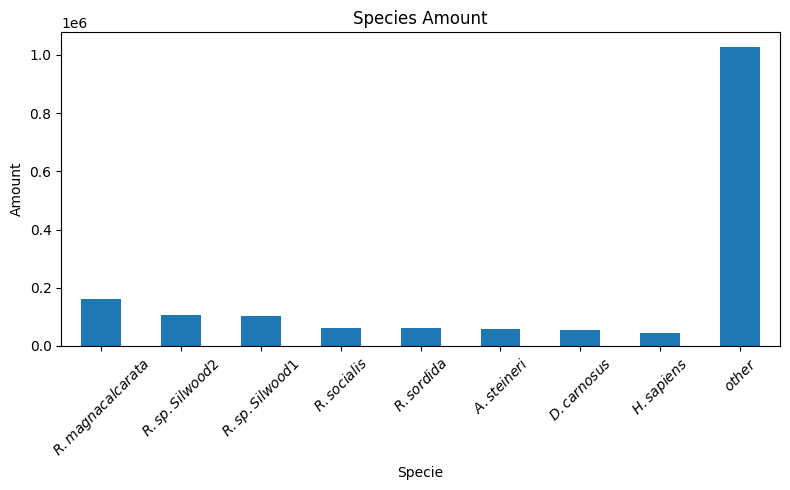

In [12]:
plt.figure(figsize=(8,5))
top.plot(kind="bar")
plt.title("Species Amount")
plt.xlabel("Specie")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()